## 统计分布以及随机数生成

**逆变换采样**
wiki[https://zh.wikipedia.org/wiki/%E9%80%86%E5%8F%98%E6%8D%A2%E9%87%87%E6%A0%B7]
本部分介绍如何对特定的分布进行抽样
对于一些特定的分布，python中有现成的函数可以使用。其实，只要知道一个分布的cdf，那么我们都可以自己编写函数实现抽样功能。
假设我们要根据某个概率分布抽样，首先我们可以在一个$U(0,1)$分布随机抽样，然后通过构造$Y=F^{-1}(x)$计算出样本的值。

显然逆变换采样需要目标分布的反函数可以求解。

下面给出解释：
$U(0,1)$分布的cdf为
$$F(x) = P(X\leq x) = x $$

那么对一个随机变量$Y$ ，cdf为
$$G(y) = P(Y\leq y)=P(F^{-1}(X)\leq y) = P(X\leq F(y))=F(y) $$

1.**均匀分布**
对于给定的区间$[a,b]$上的均匀分布,其pdf为

$$
f(x) = 
\begin{cases} 
\frac{1}{b-a} & \text{for } a \leq x \leq b \\
0 & \text{otherwise}
\end{cases}
$$


In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Text(0.5, 1.0, 'uniform distribution')

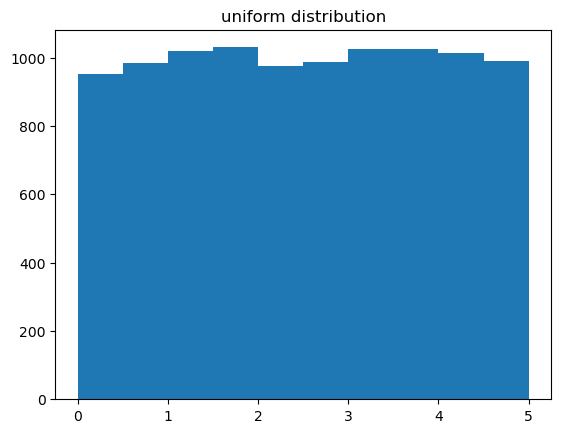

In [11]:
#均匀分布抽样

radnom_numbers = np.random.uniform(0,5,10000)
plt.hist(radnom_numbers)
plt.title('uniform distribution')

In [3]:
"""
常见的分布的scipy实现
scipy提供非常多的随机变量
"""
from scipy import stats
#查看所有的连续随机变量
list = [k for k,v in stats.__dict__.items() if isinstance(v,stats.rv_continuous)]
print(list)

['ksone', 'kstwo', 'kstwobign', 'norm', 'alpha', 'anglit', 'arcsine', 'beta', 'betaprime', 'bradford', 'burr', 'burr12', 'fisk', 'cauchy', 'chi', 'chi2', 'cosine', 'dgamma', 'dweibull', 'expon', 'exponnorm', 'exponweib', 'exponpow', 'fatiguelife', 'foldcauchy', 'f', 'foldnorm', 'weibull_min', 'truncweibull_min', 'weibull_max', 'genlogistic', 'genpareto', 'genexpon', 'genextreme', 'gamma', 'erlang', 'gengamma', 'genhalflogistic', 'genhyperbolic', 'gompertz', 'gumbel_r', 'gumbel_l', 'halfcauchy', 'halflogistic', 'halfnorm', 'hypsecant', 'gausshyper', 'invgamma', 'invgauss', 'geninvgauss', 'norminvgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'laplace', 'laplace_asymmetric', 'levy', 'levy_l', 'logistic', 'loggamma', 'loglaplace', 'lognorm', 'gibrat', 'maxwell', 'mielke', 'kappa4', 'kappa3', 'moyal', 'nakagami', 'ncx2', 'ncf', 't', 'nct', 'pareto', 'lomax', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rdist', 'rayleigh', 'loguniform', 'reciprocal', 'rice', 'recipinvgauss', 'semi

现在用指数分布实验一下上面的结论
指数分布的cdf
$$ y = 1-e^{-\lambda x} (x\leq 0)$$
反函数
$$ y = -\frac{ln(1-x)}{\lambda} $$

Text(0.5, 1.0, 'Inverse Transform Sampling')

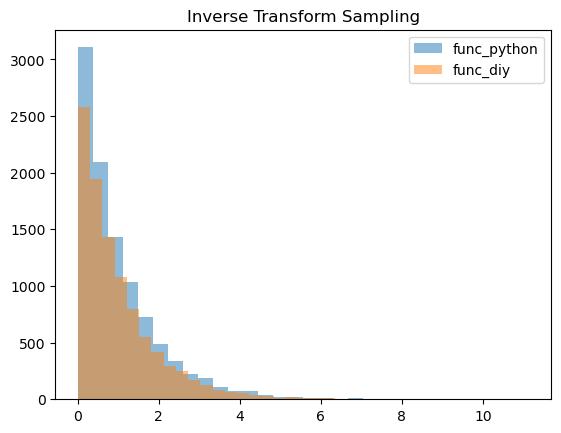

In [16]:
n = 10000 #抽样数量n
lambda_param = 1 #抽样分布的参数
y1 = stats.expon.rvs(scale=1/lambda_param,size=n)

x2 = np.random.uniform(0,1,n)
y2 =  np.log(1-x2)/-lambda_param# 求反函数

plt.hist(y1,label='func_python',alpha=0.5,bins=30)
plt.hist(y2,label='func_diy',alpha=0.5,bins=30)
plt.legend()
plt.title('Inverse Transform Sampling')

**Box-Muller方法**对正太分布进行采样


## Bootstrap

估计参数的标准误:在统计中，我们需要知道总体的分布，那么就需要知道关于总体的参数，而参数需要通过有些方法(例如极大似然估计)得到，参数也会有其相应的分布，那么要怎么估计参数的标准误差呢。如果是估计均值，根据中心极限定理我们知道均值的抽样分布是一个正态分布，那么我们可以以此计算次分布的参数得到标准误差。但是如果想要估计类似中位数、相关系数等统计量，没有类似均值估计这样明确的分布，那么可以怎么样估计这种统计量的标准误呢。


自助法Bootstrap是从给定的数据集中有放回的均匀抽样，那么意味着每个样本在每一次都等可能的入样，一个数据集$D$有m个样本，每次随机从D中选一个样本，将其拷贝入$D'$中，然后再把样本放回，重复执行m次后得到的数据集$D'$与原数据大小一样。
如果我们重复上述的采样过程n次，可以得到n个大小为m的数据集$D_1,D_2,...D_n$，对所有n个样本进行参数估计，每个参数可以得到n个估计值。利用这个统计量可以构建一个抽样分布。

描述
1.样本估计总体分布$F$为$\hat F$
2.从分布$\hat F$中抽取独立的样本$Y^{i},i=1,2,3,...n$每一个样本集合都被称为一个bootstrap样本
3.从每个bootstrap样本$Y^i$得到对某一个统计量的估计值$g(Y^i)$

Bootstrap还可以用于机器学习，作为入样部分作为训练集和未入样部分为验证集，形成一个包外估计。

某个样本在m次采样中始终不会被采集到的概率为$(1-\frac{1}{m})^m$

In [11]:
samples = stats.chi.rvs(4,size=10000)

In [9]:
def bootstrap(sample,*,bootstrap_size:int,sample_size:int):
    bootsample_list = []
    boot_means = []
    for i in range(bootstrap_size):
        bootsample = np.random.choice(sample,size=sample_size,replace=True)
        bootsample_list.append(bootsample)
        #mean
        boot_means.append(bootsample.mean())
    bootmean = np.mean(boot_means)
    bootmean_std = np.std(boot_means)

    return bootmean,bootmean_std,bootsample_list


In [10]:
bootmean,bootmean_std,bootsample = bootstrap(samples,bootstrap_size=10,sample_size=10000)


(array([  6.,  45., 124., 267., 400., 515., 773., 838., 963., 989., 938.,
        854., 739., 664., 538., 373., 301., 245., 156., 100.,  67.,  46.,
         26.,  15.,  10.,   4.,   2.,   1.,   0.,   1.]),
 array([0.12782356, 0.29551798, 0.4632124 , 0.63090682, 0.79860124,
        0.96629566, 1.13399008, 1.30168449, 1.46937891, 1.63707333,
        1.80476775, 1.97246217, 2.14015659, 2.30785101, 2.47554543,
        2.64323984, 2.81093426, 2.97862868, 3.1463231 , 3.31401752,
        3.48171194, 3.64940636, 3.81710077, 3.98479519, 4.15248961,
        4.32018403, 4.48787845, 4.65557287, 4.82326729, 4.99096171,
        5.15865612]),
 <BarContainer object of 30 artists>)

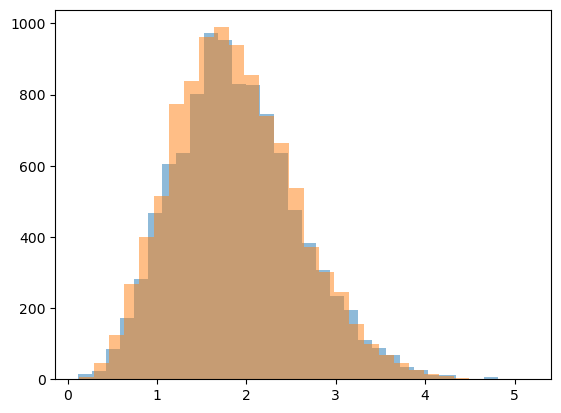

In [14]:
plt.hist(bootsample[0],alpha=0.5,label='bootsample',bins=30)
plt.hist(samples,alpha=0.5,label='chi distribution',bins=30)

**Bootstrap误差估计的例子**

计算广义线性回归模型（logistic回归）的参数估计的误差和偏差。

## 拒绝采样(reject sampling)

对于一个目标分布的pdf $p(x)$,考虑选择另一个分布$q(x)$,注意这个分布是一个相对简单的分布，例如高斯分布或者均匀分布，作为一个参考分布。引入一个常数$M$,使得$$p(x)\leq kq(x)$$.

1.对于每次采样，首先在$q(x)$分布中得到一个样本$x_i$

2.从均匀分布$U(0,1)$中得到一个随机数$u_i$

3.计算这个样本$x_i$的接受概率 $$\alpha = \frac{p(x_i)}{Mq(x_i)}$$

4.如果这个$u_i \leq \alpha$，那么接受这个样本，否则拒绝。重复1，2，3的步骤

显然，如何找到这个参考分布很重要。


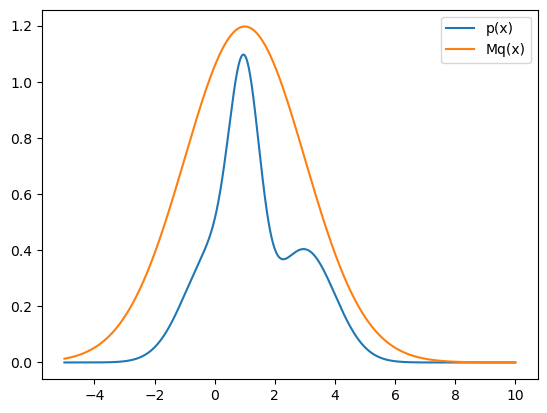

In [34]:
#样例
x = np.linspace(-5,10,10000)
y1 = stats.norm.pdf(x,0,1)+stats.norm.pdf(x,3,1)+stats.norm.pdf(x,1,0.5)
M=6 #M=[2,3,4,5,6]
y2 = M*(stats.norm.pdf(x,1,2))
plt.plot(x,y1,label='p(x)')
plt.plot(x,y2,label='Mq(x)')
plt.legend()

In [37]:
#正态分布

def reject_sampling(M,size):
    samples = []
    while len(samples)<=size:
        x_i = stats.norm.rvs(1,2,1)
        q = stats.norm.pdf(x_i,1,2)
        p = stats.norm.pdf(x_i,0,1)+stats.norm.pdf(x_i,3,1)+stats.norm.pdf(x_i,1,0.5)
        alpha = p/(M*q)
        u = stats.uniform.rvs(0,1,1)
        if alpha>u:
            samples.append(x_i)
    return samples

In [ ]:
samples = reject_sampling(6,10000)

(array([   4.,    3.,    9.,   21.,   46.,   87.,  156.,  255.,  286.,
         394.,  492.,  706.,  913., 1127., 1095.,  839.,  571.,  425.,
         422.,  438.,  416.,  405.,  318.,  234.,  159.,   83.,   64.,
          22.,    8.,    3.]),
 array([-3.57164003, -3.24497765, -2.91831527, -2.59165289, -2.26499051,
        -1.93832812, -1.61166574, -1.28500336, -0.95834098, -0.6316786 ,
        -0.30501621,  0.02164617,  0.34830855,  0.67497093,  1.00163331,
         1.3282957 ,  1.65495808,  1.98162046,  2.30828284,  2.63494522,
         2.96160761,  3.28826999,  3.61493237,  3.94159475,  4.26825714,
         4.59491952,  4.9215819 ,  5.24824428,  5.57490666,  5.90156905,
         6.22823143]),
 <BarContainer object of 30 artists>)

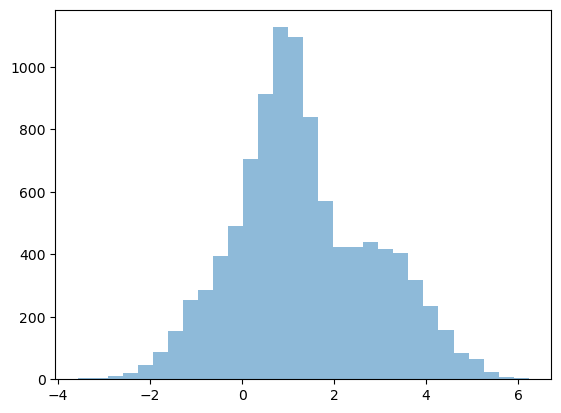

In [47]:
#samples = [sample[0] for sample in samples]
plt.hist(samples,bins=30,alpha=0.5)

## 蒙特卡洛方法/随机模拟
使用采样和近似平均的方法估计一些难以直接计算的值

1.蒙特卡洛求圆周率

2.蒙特卡洛求积分
